In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as T
from torchvision.datasets import MNIST

from dataset import ActiveLearningDataset
from utils import CandidateBatch

In [2]:
transform = T.Compose([T.ToTensor()])
train_set = MNIST(root="./dataset", train=True, transform=transform, download=True)

/Users/nannullna/.pyenv/versions/3.9.6/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


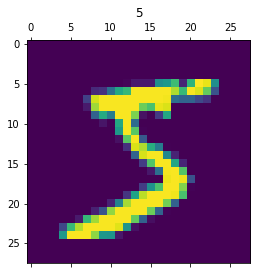

In [3]:
idx = 0
plt.matshow(train_set[idx][0].squeeze(0))
plt.title(str(train_set[idx][1]))
plt.show()

In [4]:
al_dataset = ActiveLearningDataset(train_set)

In [5]:
len(al_dataset.unlabeled_ids), len(al_dataset.labeled_ids)

(60000, 0)

In [6]:
candidates = CandidateBatch([1.0, 0.9, 0.8], [1, 2, 3])
al_dataset.update(candidates)

In [7]:
len(al_dataset.unlabeled_ids), len(al_dataset.labeled_ids)

(59997, 3)